In [1]:
import csv

import numpy
import scipy

import matplotlib.pyplot as plt
## Matplotlib style
%matplotlib inline

plt.style.use('ggplot')
from sklearn import neighbors
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [2]:
## Classifiers (KNN and NB) evaluation:

In [6]:
fileName = "wdbc.csv"
fileOpen = open(fileName, "rU")
csvData = csv.reader(fileOpen)
dataList = list(csvData)
dataArray =  numpy.array(dataList)
X = dataArray[:,2:32].astype(float)
y = dataArray[:, 1]
le = preprocessing.LabelEncoder()
le.fit(y)
y_transformed = le.transform(y)

In [9]:
## Randomly split the data between training and testing:
X_train, X_test, Y_train, Y_test = train_test_split(X, y_transformed)

In [10]:
knnK3 = neighbors.KNeighborsClassifier(n_neighbors = 3)
knnK15 = neighbors.KNeighborsClassifier(n_neighbors = 15)
nbmodel = GaussianNB()

In [11]:
knn3scores = cross_validation.cross_val_score(knnK3, X_train, Y_train, cv = 5) # cv: nb of samples the data is split into
print knn3scores 
print knn3scores.mean(), knn3scores.std()

[ 0.90697674  0.91764706  0.91764706  0.92941176  0.92941176]
0.920218878249 0.0084569610106


In [12]:
# Plot accuracy means and sd for diff values of k-fold cross-validations

In [13]:
meansKNNK3, sdsKNNK3, meansKNNK15, sdsKNNK15, meansNB, sdsNB = [], [], [], [], [], []

In [14]:
ks = range(2, 21) # nb ok k-folds to test

In [15]:
for k in ks:
    knn3scores = cross_validation.cross_val_score(knnK3, X_train, Y_train, cv=k)
    knn15scores = cross_validation.cross_val_score(knnK15, X_train, Y_train, cv=k)
    nbscores = cross_validation.cross_val_score(nbmodel, X_train, Y_train, cv=k)
    meansKNNK3.append(knn3scores.mean()) 
    sdsKNNK3.append(knn3scores.std())
    meansKNNK15.append(knn15scores.mean())
    sdsKNNK15.append(knn15scores.std())
    meansNB.append(nbscores.mean())
    sdsNB.append(nbscores.std())

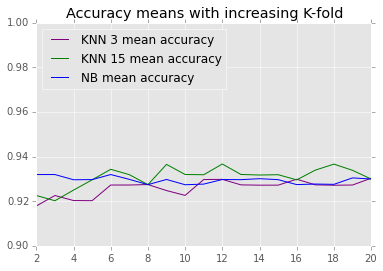

In [16]:
plt.plot(ks, meansKNNK3, label="KNN 3 mean accuracy", color="purple")
plt.plot(ks, meansKNNK15, label="KNN 15 mean accuracy", color="green")
plt.plot(ks, meansNB, label="NB mean accuracy", color="blue")
plt.legend(loc=2)
plt.ylim(0.9, 1)
plt.title("Accuracy means with increasing K-fold")

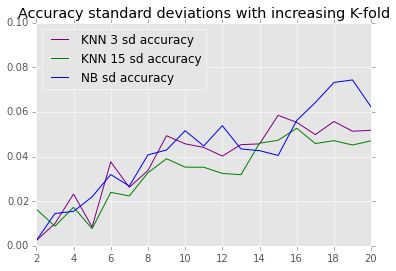

In [17]:
plt.plot(ks, sdsKNNK3, label="KNN 3 sd accuracy", color="purple")
plt.plot(ks, sdsKNNK15, label="KNN 15 sd accuracy", color="green")
plt.plot(ks, sdsNB, label="NB sd accuracy", color="blue")
plt.legend(loc=2)
plt.ylim(0, 0.1)
plt.title("Accuracy standard deviations with increasing K-fold")